In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
actual_data_path = "actual.csv"
independent_data_path = "data_set_ALL_AML_independent.csv"
train_data_path = "data_set_ALL_AML_train.csv"

In [4]:
actual_data = pd.read_csv(actual_data_path)
independent_data = pd.read_csv(independent_data_path)
train_data = pd.read_csv(train_data_path)

In [5]:
actual_data.tail(5)

,patient,cancer
67,68,ALL
68,69,ALL
69,70,ALL
70,71,ALL
71,72,ALL


In [6]:
actual_data.dtypes

patient     int64
cancer     object
dtype: object

In [7]:
actual_data.head(5)

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [8]:
actual_data.shape

(72, 2)

In [9]:
actual_data.nunique

<bound method DataFrame.nunique of     patient cancer
0         1    ALL
1         2    ALL
2         3    ALL
3         4    ALL
4         5    ALL
..      ...    ...
67       68    ALL
68       69    ALL
69       70    ALL
70       71    ALL
71       72    ALL

[72 rows x 2 columns]>

In [15]:
actual_data.describe()

,patient
count,72.00000
mean,36.50000
std,20.92845
min,1.00000
25%,18.75000
50%,36.50000
75%,54.25000
max,72.00000


In [10]:
actual_data.columns

Index(['patient', 'cancer'], dtype='object')

In [11]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   patient  72 non-null     int64 
 1   cancer   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


<Figure size 2000x2000 with 0 Axes>

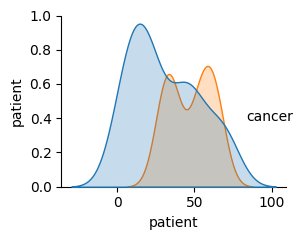

In [12]:
plt.figure(figsize=(20,20))
sns.pairplot(data=actual_data,hue='cancer')
plt.tight_layout()

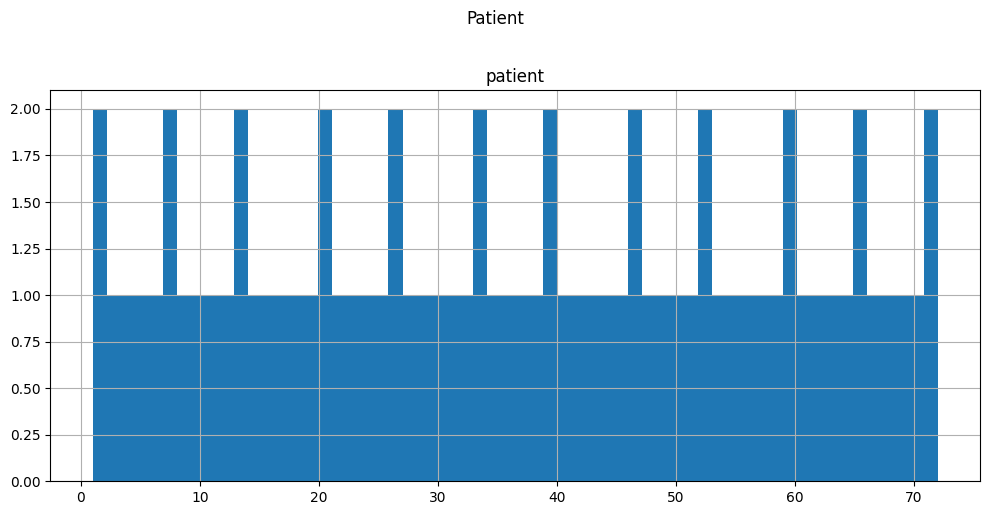

In [13]:
actual_data.hist(bins=60, figsize=(10,5))
plt.suptitle('Patient', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()

In [14]:
from scipy import stats
z_scores = np.abs(stats.zscore(actual_data['patient']))
threshold = 3
actual_data_no_outliers = actual_data[(z_scores < threshold)]

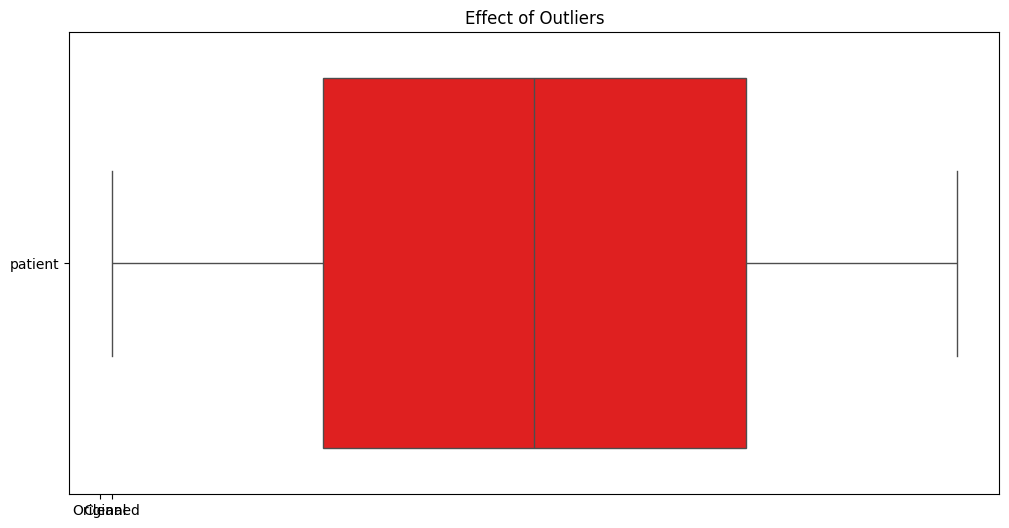

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=[actual_data['patient'], actual_data_no_outliers['patient']], orient='h', palette=['red', 'blue'])
plt.title("Effect of Outliers")
plt.xticks([0, 1], ['Original', 'Cleaned'])
plt.show()

In [16]:
actual_data = actual_data.isnull().sum()
print("Missing Data:")
print(actual_data)

Missing Data:
patient    0
cancer     0
dtype: int64


In [17]:
actual_data['cancer'] = actual_data['cancer'].astype(str)

In [18]:
print(actual_data['cancer'].dtype)

<U1


In [19]:
actual_data = pd.read_csv(actual_data_path, dtype={'cancer': str})

In [20]:
cancer_counts = actual_data['cancer'].value_counts()
print("Cancer Types Distribution:")
print(cancer_counts)

Cancer Types Distribution:
cancer
ALL    47
AML    25
Name: count, dtype: int64


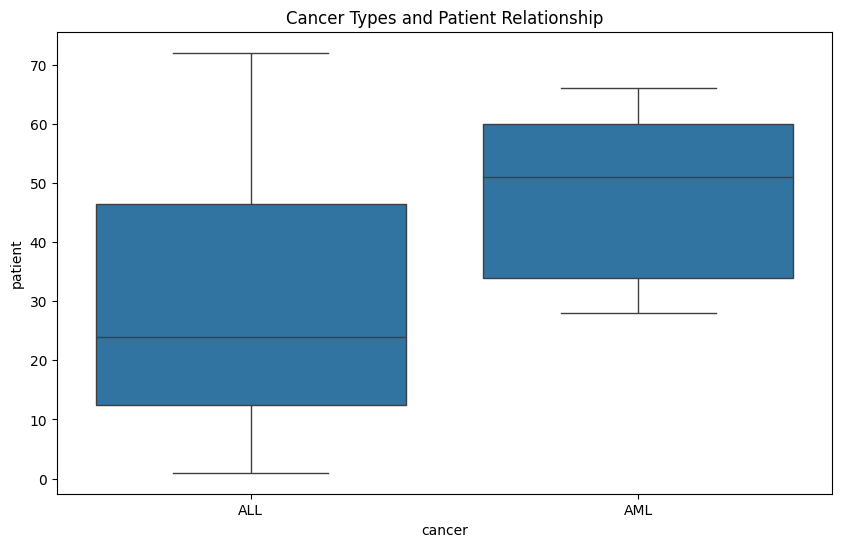

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=actual_data, x='cancer', y='patient')
plt.title("Cancer Types and Patient Relationship")
plt.show()

In [22]:
actual_data = pd.get_dummies(actual_data, columns=['cancer'], drop_first=True)

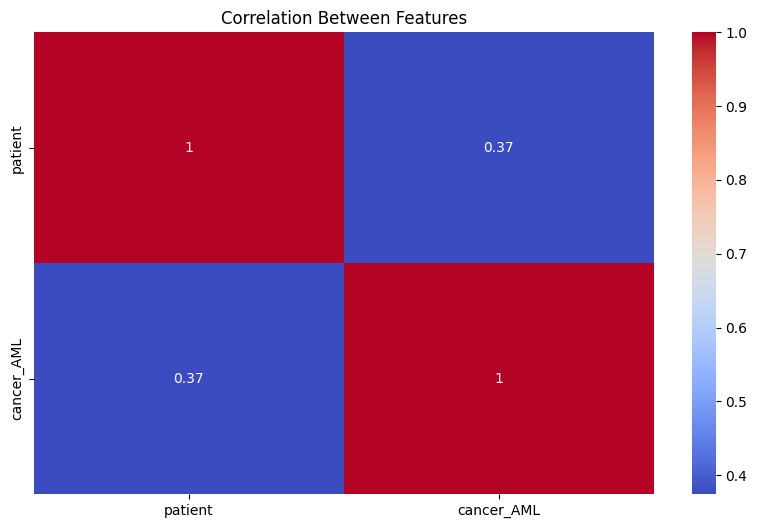

In [23]:
correlation_matrix = actual_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

In [24]:
cancer1_data = actual_data[actual_data['cancer_AML'] == 0]
cancer2_data = actual_data[actual_data['cancer_AML'] == 1]

In [25]:
aml_stats = cancer1_data.describe()
all_stats = cancer2_data.describe()

In [26]:
gene_expression1 = cancer1_data['cancer_AML']
gene_expression2 = cancer2_data['cancer_AML']

In [27]:
t_statistic, p_value = stats.ttest_ind(gene_expression1, gene_expression2)

In [28]:
if p_value < 0.05:
    print("The difference in gene expression between the two types of cancer is statistically significant.")
else:
    print("The difference in gene expression between the two types of cancer is not statistically significant.")

The difference in gene expression between the two types of cancer is not statistically significant.


In [29]:
X = actual_data.drop(columns=['cancer_AML'])
y = actual_data['cancer_AML']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.discriminant_analysis import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
rf_model = RandomForestClassifier(random_state=42)

In [33]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Make predictions of the model
y_pred = rf_model.predict(X_test)

# Calculate the accuracy and classification of the report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

       False       1.00      0.90      0.95        10
        True       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.92      0.95      0.93        15
weighted avg       0.94      0.93      0.93        15



In [35]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[9 1]
 [0 5]]


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
y_pred = rf_model.predict(X_test)

In [38]:
cm = confusion_matrix(y_test, y_pred)

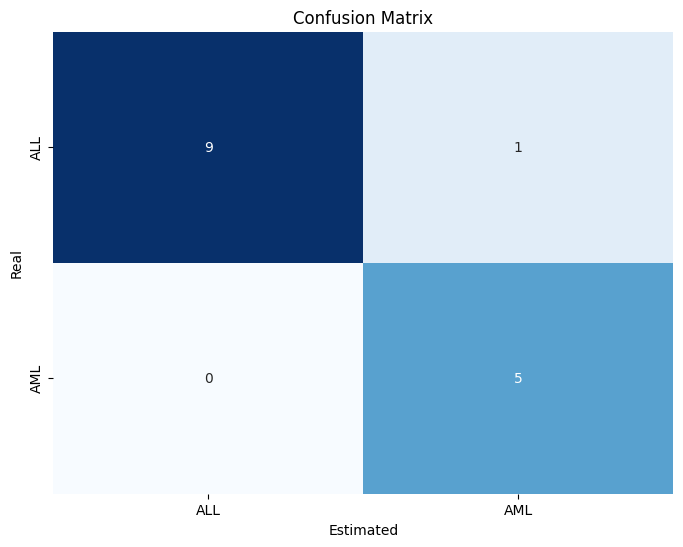

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['ALL', 'AML'], yticklabels=['ALL', 'AML'])
plt.xlabel('Estimated')
plt.ylabel('Real')
plt.title("Confusion Matrix")
plt.show()

In [40]:
from sklearn.decomposition import PCA
X = actual_data.drop(columns=['cancer_AML'])
y = actual_data['cancer_AML']

In [41]:
pca = PCA(n_components=min(X.shape[0], X.shape[1]))
X_pca = pca.fit_transform(X)

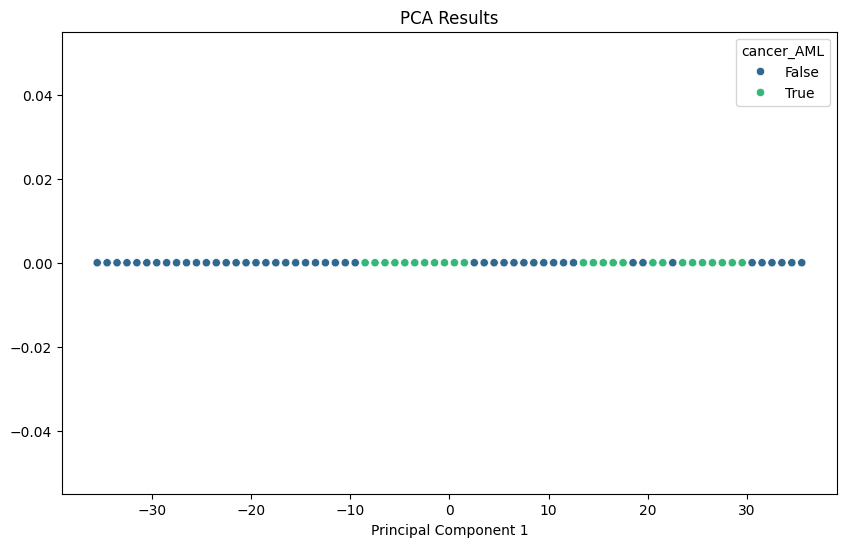

In [42]:
pca_df = pd.DataFrame({'Principal Component 1': X_pca[:, 0]})
pca_df['cancer_AML'] = y

# Visualize PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='Principal Component 1', y=np.zeros_like(X_pca[:, 0]), hue='cancer_AML', palette='viridis')
plt.title("PCA Results")
plt.xlabel("Principal Component 1")
plt.show()

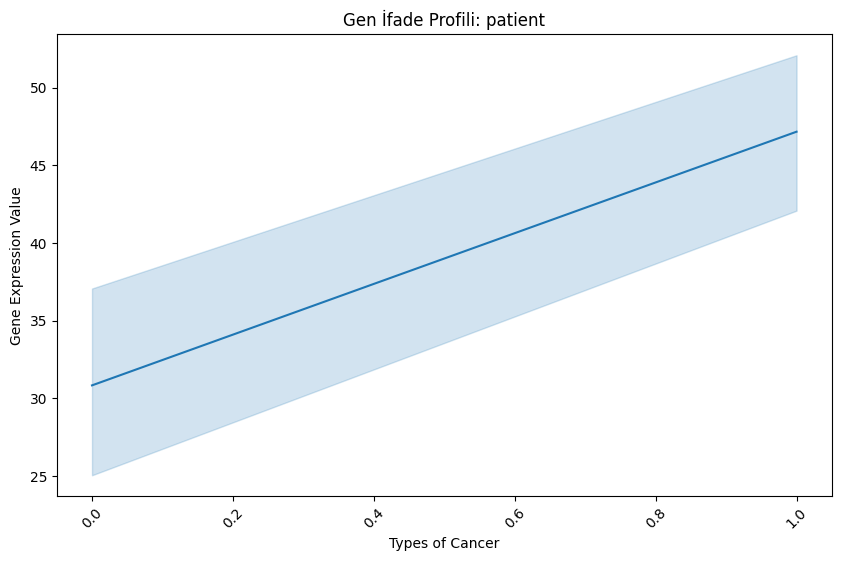

In [43]:
# Select a gene name that is present in your dataset (for example, the first ranked gene name)
selected_gene = X.columns[0]

# Profile the expression of the selected gene
gene_expression = X[selected_gene]

# Create a line graph showing the gene expression profile by cancer types
plt.figure(figsize=(10, 6))
sns.lineplot(data=pd.DataFrame({'Gene Expression': gene_expression, 'Cancer Type': y}), x='Cancer Type', y='Gene Expression')
plt.title(f'Gen İfade Profili: {selected_gene}')
plt.xlabel('Types of Cancer')
plt.ylabel('Gene Expression Value')
plt.xticks(rotation=45)
plt.show()

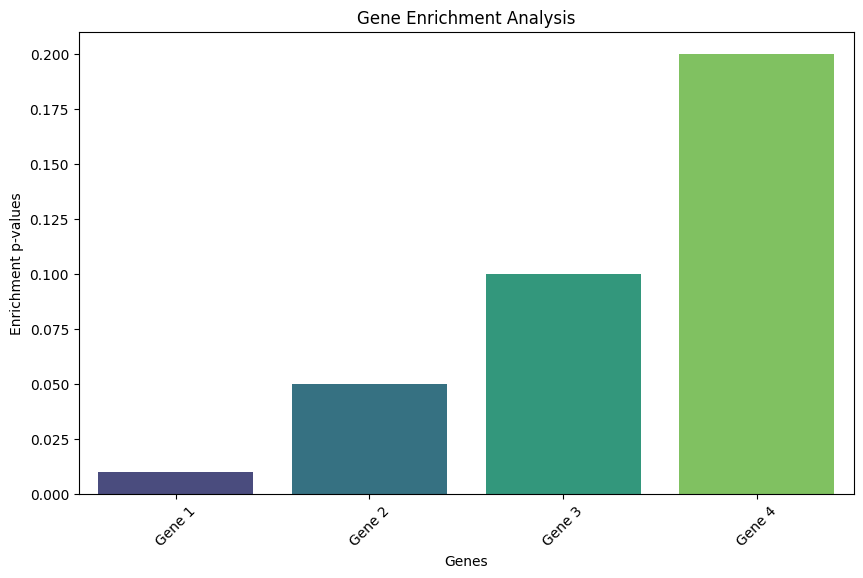

In [44]:
# Enrichment p-values of some genes as an example
enrichment_p_values = [0.01, 0.05, 0.1, 0.2]

# Draw a bar chart showing the enrichment p-values
plt.figure(figsize=(10, 6))
sns.barplot(x=['Gene 1', 'Gene 2', 'Gene 3', 'Gene 4'], y=enrichment_p_values, palette='viridis')
plt.title('Gene Enrichment Analysis')
plt.xlabel('Genes')
plt.ylabel('Enrichment p-values')
plt.xticks(rotation=45)
plt.show()

In [45]:
from sklearn.metrics import roc_curve, auc
y_true = np.random.randint(2, size=100)
y_scores = np.random.rand(100)

In [46]:
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

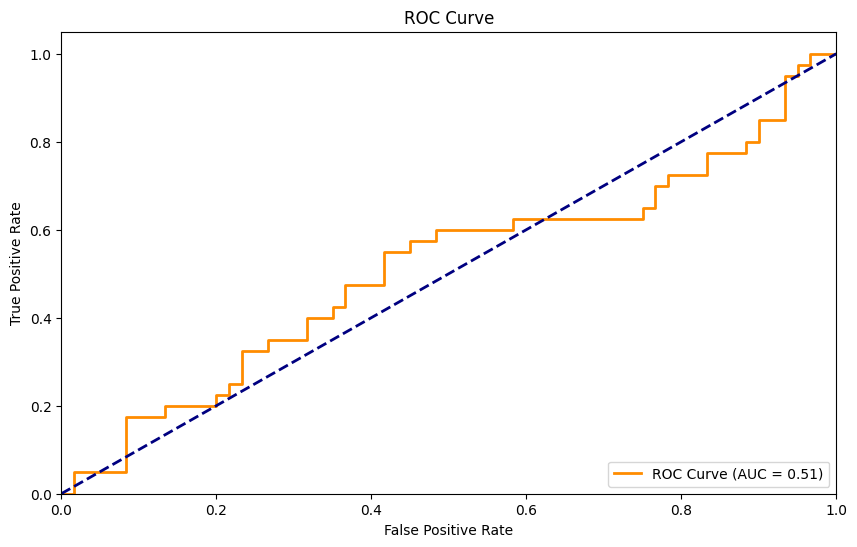

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [48]:
independent_data.tail(5)

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,1074,A,67,A,893,P,722,A,...,707,A,423,A,809,A,466,A,551,A
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,475,A,263,A,297,A,170,A,...,354,A,41,A,445,A,349,A,194,A
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,48,A,-33,A,6,A,0,A,...,-22,A,0,A,-2,A,0,A,20,A
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,168,A,-33,A,1971,P,510,P,...,260,A,1777,P,210,A,284,A,379,A
7128,GB DEF = mRNA (clone 1A7),Z78285_f_at,-70,A,-21,A,-42,A,-73,A,...,5,A,-49,A,16,A,-73,A,-60,A


In [49]:
independent_data.dtypes

Gene Description         object
Gene Accession Number    object
39                        int64
call                     object
40                        int64
                          ...  
call.31                  object
64                        int64
call.32                  object
62                        int64
call.33                  object
Length: 70, dtype: object

In [50]:
independent_data.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [51]:
independent_data.shape

(7129, 70)

In [52]:
independent_data.nunique

<bound method DataFrame.nunique of                                        Gene Description Gene Accession Number  \
0                   AFFX-BioB-5_at (endogenous control)        AFFX-BioB-5_at   
1                   AFFX-BioB-M_at (endogenous control)        AFFX-BioB-M_at   
2                   AFFX-BioB-3_at (endogenous control)        AFFX-BioB-3_at   
3                   AFFX-BioC-5_at (endogenous control)        AFFX-BioC-5_at   
4                   AFFX-BioC-3_at (endogenous control)        AFFX-BioC-3_at   
...                                                 ...                   ...   
7124  PTGER3 Prostaglandin E receptor 3 (subtype EP3...             X83863_at   
7125  HMG2 High-mobility group (nonhistone chromosom...             Z17240_at   
7126      RB1 Retinoblastoma 1 (including osteosarcoma)           L49218_f_at   
7127  GB DEF = Glycophorin Sta (type A) exons 3 and ...           M71243_f_at   
7128                          GB DEF = mRNA (clone 1A7)           Z78285_f

In [53]:
independent_data.describe()

,39,40,42,47,48,49,41,43,44,45,...,54,57,58,60,61,65,66,63,64,62
count,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,...,7129.00000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.00000
mean,582.194978,527.819329,603.813719,576.027213,751.464862,601.516763,565.152476,563.614252,531.401599,530.194137,...,668.70122,497.195820,561.964371,561.004629,581.006593,556.054145,530.495020,727.593351,686.850610,671.16496
std,2473.986881,2304.800191,2377.775459,2436.848381,2437.815002,2432.454360,2352.036107,2521.409254,2335.848476,2368.906095,...,2505.06701,2436.468032,2688.424072,2615.321812,2467.740997,2360.238246,2463.108827,2488.340963,2703.734409,2659.95898
min,-21984.000000,-21296.000000,-10481.000000,-7861.000000,-16945.000000,-26775.000000,-7764.000000,-13905.000000,-9619.000000,-5353.000000,...,-11978.00000,-11067.000000,-16131.000000,-9338.000000,-16268.000000,-14244.000000,-7626.000000,-20782.000000,-26258.000000,-11973.00000
25%,-33.000000,-36.000000,-17.000000,-8.000000,-6.000000,-65.000000,-7.000000,-21.000000,-45.000000,-59.000000,...,-10.00000,-27.000000,-49.000000,-19.000000,-36.000000,-31.000000,-15.000000,-21.000000,-51.000000,-20.00000
50%,125.000000,124.000000,116.000000,126.000000,158.000000,139.000000,93.000000,110.000000,74.000000,78.000000,...,151.00000,82.000000,129.000000,98.000000,117.000000,99.000000,73.000000,162.000000,195.000000,136.00000
75%,439.000000,424.000000,420.000000,374.000000,577.000000,552.000000,342.000000,372.000000,321.000000,327.000000,...,469.00000,296.000000,435.000000,321.000000,422.000000,366.000000,280.000000,578.000000,683.000000,474.00000
max,45815.000000,29136.000000,37529.000000,43221.000000,25231.000000,29500.000000,31076.000000,49432.000000,35402.000000,34741.000000,...,35742.00000,38690.000000,59647.000000,40792.000000,37374.000000,27447.000000,53204.000000,31585.000000,71369.000000,48374.00000


In [54]:
independent_data.columns

Index(['Gene Description', 'Gene Accession Number', '39', 'call', '40',
       'call.1', '42', 'call.2', '47', 'call.3', '48', 'call.4', '49',
       'call.5', '41', 'call.6', '43', 'call.7', '44', 'call.8', '45',
       'call.9', '46', 'call.10', '70', 'call.11', '71', 'call.12', '72',
       'call.13', '68', 'call.14', '69', 'call.15', '67', 'call.16', '55',
       'call.17', '56', 'call.18', '59', 'call.19', '52', 'call.20', '53',
       'call.21', '51', 'call.22', '50', 'call.23', '54', 'call.24', '57',
       'call.25', '58', 'call.26', '60', 'call.27', '61', 'call.28', '65',
       'call.29', '66', 'call.30', '63', 'call.31', '64', 'call.32', '62',
       'call.33'],
      dtype='object')

In [55]:
independent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gene Description       7129 non-null   object
 1   Gene Accession Number  7129 non-null   object
 2   39                     7129 non-null   int64 
 3   call                   7129 non-null   object
 4   40                     7129 non-null   int64 
 5   call.1                 7129 non-null   object
 6   42                     7129 non-null   int64 
 7   call.2                 7129 non-null   object
 8   47                     7129 non-null   int64 
 9   call.3                 7129 non-null   object
 10  48                     7129 non-null   int64 
 11  call.4                 7129 non-null   object
 12  49                     7129 non-null   int64 
 13  call.5                 7129 non-null   object
 14  41                     7129 non-null   int64 
 15  call.6               

In [56]:
independent_data = pd.get_dummies(independent_data, drop_first=True)

In [57]:
scaler = StandardScaler()

In [58]:
scaled_X = scaler.fit_transform(independent_data)

In [59]:
model = PCA(n_components=2)

In [60]:
principal_components = model.fit_transform(scaled_X)

Text(0, 0.5, 'Second Principal Component')

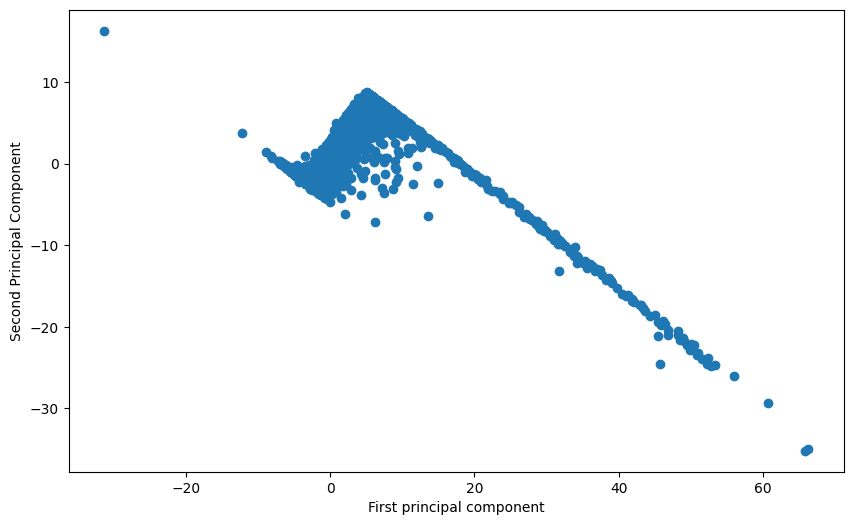

In [61]:
plt.figure(figsize=(10,6))
plt.scatter(principal_components[:,0],principal_components[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [62]:
model.n_components

2

In [63]:
model.components_

array([[ 0.13688445,  0.14109099,  0.1424812 , ...,  0.09117882,
        -0.0002416 ,  0.09294923],
       [-0.09156918, -0.09361336, -0.08244424, ...,  0.11962627,
         0.01065292,  0.13415627]])

In [64]:
df_comp = pd.DataFrame(model.components_,index=['PC1','PC2'],columns=independent_data.columns)

In [65]:
df_comp

,39,40,42,47,48,49,41,43,44,45,...,call.29_M,call.29_P,call.30_M,call.30_P,call.31_M,call.31_P,call.32_M,call.32_P,call.33_M,call.33_P
PC1,0.136884,0.141091,0.142481,0.138498,0.145582,0.142220,0.143650,0.135674,0.141402,0.142309,...,0.003151,0.097565,0.001438,0.090663,-0.000022,0.091999,0.00148,0.091179,-0.000242,0.092949
PC2,-0.091569,-0.093613,-0.082444,-0.096211,-0.057471,-0.085939,-0.092269,-0.094433,-0.091889,-0.088797,...,0.019488,0.119714,0.013673,0.128214,0.010227,0.147749,0.01414,0.119626,0.010653,0.134156


In [66]:
model.explained_variance_ratio_

array([0.0028036 , 0.00103782])

In [67]:
np.sum(model.explained_variance_ratio_)

0.0038414208894921916

In [68]:
pca_30 = PCA(n_components=30)
pca_30.fit(scaled_X)

PCA(n_components=30)

In [69]:
pca_30.explained_variance_ratio_

array([0.0028036 , 0.00103782, 0.00027996, 0.00022054, 0.00021493,
       0.0002123 , 0.00020978, 0.00020886, 0.00020466, 0.00020395,
       0.00020094, 0.00020001, 0.00019831, 0.00019673, 0.00019516,
       0.00019261, 0.00019171, 0.00019019, 0.00018734, 0.00018294,
       0.00018262, 0.00018146, 0.00018039, 0.00017805, 0.00017397,
       0.00017088, 0.00017007, 0.00016652, 0.00016499, 0.0001624 ])

In [70]:
np.sum(pca_30.explained_variance_ratio_)

0.00926370512178563

In [102]:
explained_variance = []

for n in range(1,30):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

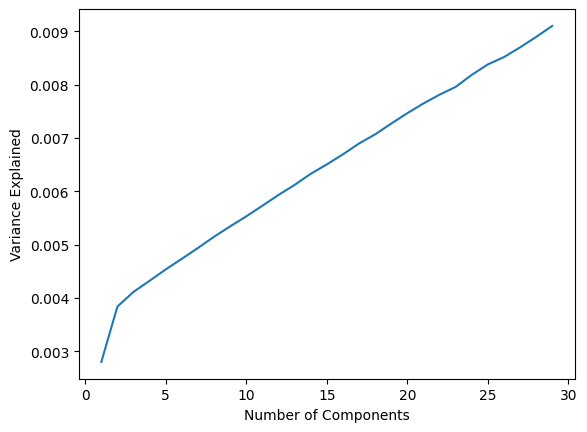

In [103]:
plt.plot(range(1,30),explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

In [77]:
train_data.tail(5)

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,793,A,782,A,1138,A,627,A,...,279,A,737,A,588,A,1170,A,2315,A
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,329,A,295,A,777,P,170,A,...,51,A,227,A,361,A,284,A,250,A
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,36,A,11,A,41,A,-50,A,...,6,A,-9,A,-26,A,39,A,-12,A
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,191,A,76,A,228,A,126,A,...,2484,P,371,A,133,A,298,A,790,P
7128,GB DEF = mRNA (clone 1A7),Z78285_f_at,-37,A,-14,A,-41,A,-91,A,...,-2,A,-31,A,-32,A,-3,A,-10,A


In [78]:
train_data.dtypes

Gene Description         object
Gene Accession Number    object
1                         int64
call                     object
2                         int64
                          ...  
call.35                  object
32                        int64
call.36                  object
33                        int64
call.37                  object
Length: 78, dtype: object

In [79]:
train_data.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [80]:
train_data.shape

(7129, 78)

In [81]:
train_data.nunique

<bound method DataFrame.nunique of                                        Gene Description Gene Accession Number  \
0                   AFFX-BioB-5_at (endogenous control)        AFFX-BioB-5_at   
1                   AFFX-BioB-M_at (endogenous control)        AFFX-BioB-M_at   
2                   AFFX-BioB-3_at (endogenous control)        AFFX-BioB-3_at   
3                   AFFX-BioC-5_at (endogenous control)        AFFX-BioC-5_at   
4                   AFFX-BioC-3_at (endogenous control)        AFFX-BioC-3_at   
...                                                 ...                   ...   
7124  PTGER3 Prostaglandin E receptor 3 (subtype EP3...             X83863_at   
7125  HMG2 High-mobility group (nonhistone chromosom...             Z17240_at   
7126      RB1 Retinoblastoma 1 (including osteosarcoma)           L49218_f_at   
7127  GB DEF = Glycophorin Sta (type A) exons 3 and ...           M71243_f_at   
7128                          GB DEF = mRNA (clone 1A7)           Z78285_f

In [82]:
train_data.describe()

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,28,29,30,31,32,33
count,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,...,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000
mean,641.367092,690.246318,698.307897,600.985271,679.532894,564.797728,584.437649,571.359097,789.713705,599.483097,...,514.496704,775.143498,689.248141,626.885959,673.279422,556.463179,718.934493,598.648899,676.920887,723.563473
std,2264.294361,2468.814372,2485.656277,2340.047428,2375.895416,2494.604090,2412.812263,2378.780450,2580.157021,2421.156219,...,2440.722824,2676.664777,2543.537830,2473.180838,2413.149603,2376.681824,2533.678058,2405.268550,2436.964933,2507.382019
min,-19826.000000,-17930.000000,-27182.000000,-23396.000000,-10339.000000,-21658.000000,-24024.000000,-27570.000000,-25171.000000,-12500.000000,...,-16281.000000,-27398.000000,-23673.000000,-23645.000000,-20376.000000,-9501.000000,-17580.000000,-25491.000000,-28400.000000,-27811.000000
25%,-21.000000,-14.000000,-31.000000,-33.000000,8.000000,-26.000000,-33.000000,-58.000000,-14.000000,-15.000000,...,-43.000000,-27.000000,-23.000000,-22.000000,-16.000000,-13.000000,-25.000000,-32.000000,-22.000000,-38.000000
50%,159.000000,130.000000,177.000000,139.000000,146.000000,106.000000,134.000000,140.000000,166.000000,103.000000,...,108.000000,144.000000,134.000000,133.000000,150.000000,82.000000,128.000000,107.000000,155.000000,170.000000
75%,535.000000,488.000000,610.000000,497.000000,471.000000,401.000000,497.000000,527.000000,609.000000,386.000000,...,396.000000,569.000000,505.000000,490.000000,517.000000,309.000000,488.000000,443.000000,549.000000,649.000000
max,31086.000000,29288.000000,28056.000000,31449.000000,29543.000000,38467.000000,41911.000000,40065.000000,23602.000000,28033.000000,...,61228.000000,37164.000000,32204.000000,29169.000000,29833.000000,30354.000000,25055.000000,28350.000000,25093.000000,32946.000000


In [83]:
train_data.columns

Index(['Gene Description', 'Gene Accession Number', '1', 'call', '2', 'call.1',
       '3', 'call.2', '4', 'call.3', '5', 'call.4', '6', 'call.5', '7',
       'call.6', '8', 'call.7', '9', 'call.8', '10', 'call.9', '11', 'call.10',
       '12', 'call.11', '13', 'call.12', '14', 'call.13', '15', 'call.14',
       '16', 'call.15', '17', 'call.16', '18', 'call.17', '19', 'call.18',
       '20', 'call.19', '21', 'call.20', '22', 'call.21', '23', 'call.22',
       '24', 'call.23', '25', 'call.24', '26', 'call.25', '27', 'call.26',
       '34', 'call.27', '35', 'call.28', '36', 'call.29', '37', 'call.30',
       '38', 'call.31', '28', 'call.32', '29', 'call.33', '30', 'call.34',
       '31', 'call.35', '32', 'call.36', '33', 'call.37'],
      dtype='object')

In [84]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 78 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gene Description       7129 non-null   object
 1   Gene Accession Number  7129 non-null   object
 2   1                      7129 non-null   int64 
 3   call                   7129 non-null   object
 4   2                      7129 non-null   int64 
 5   call.1                 7129 non-null   object
 6   3                      7129 non-null   int64 
 7   call.2                 7129 non-null   object
 8   4                      7129 non-null   int64 
 9   call.3                 7129 non-null   object
 10  5                      7129 non-null   int64 
 11  call.4                 7129 non-null   object
 12  6                      7129 non-null   int64 
 13  call.5                 7129 non-null   object
 14  7                      7129 non-null   int64 
 15  call.6               

In [85]:
train_data = pd.get_dummies(train_data, drop_first=True)

In [86]:
scaler = StandardScaler()

In [87]:
scaled_Y = scaler.fit_transform(train_data)

In [88]:
model = PCA(n_components=2)

In [89]:
principal_components1 = model.fit_transform(scaled_Y)

Text(0, 0.5, 'Second Principal Component')

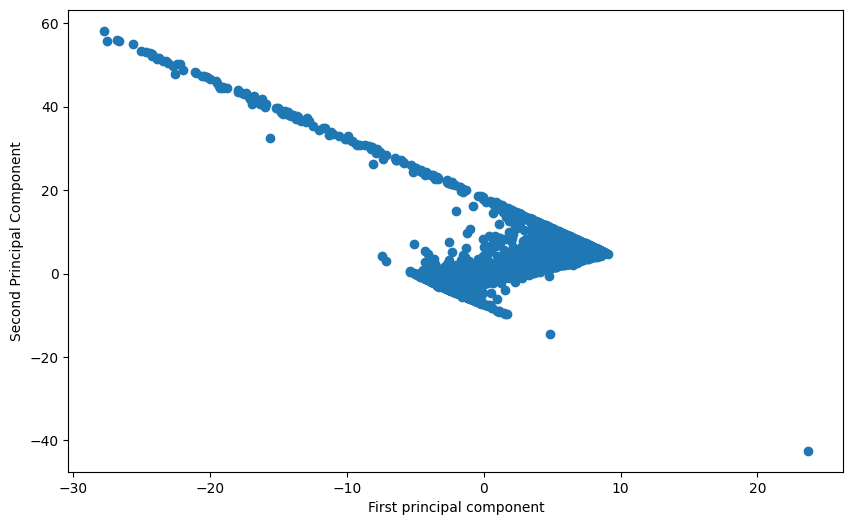

In [90]:
plt.figure(figsize=(10,6))
plt.scatter(principal_components1[:,1],principal_components1[:,0])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [91]:
model.n_components

2

In [92]:
model.components_

array([[ 0.13563518,  0.13561635,  0.1330917 , ...,  0.08910061,
         0.00126767,  0.0874186 ],
       [-0.08241288, -0.07893649, -0.07636064, ...,  0.13011465,
         0.01466849,  0.11616854]])

In [93]:
df_comp1 = pd.DataFrame(model.components_,index=['PC1','PC2'],columns=train_data.columns)

In [94]:
df_comp1

,1,2,3,4,5,6,7,8,9,10,...,call.33_M,call.33_P,call.34_M,call.34_P,call.35_M,call.35_P,call.36_M,call.36_P,call.37_M,call.37_P
PC1,0.135635,0.135616,0.133092,0.135982,0.136671,0.125829,0.129148,0.131517,0.134360,0.131408,...,0.000664,0.088992,-0.000840,0.084958,0.000900,0.091381,-0.000117,0.089101,0.001268,0.087419
PC2,-0.082413,-0.078936,-0.076361,-0.089316,-0.082128,-0.091322,-0.088349,-0.087407,-0.063705,-0.089684,...,0.008998,0.119515,0.005676,0.127984,0.013863,0.122095,0.011344,0.130115,0.014668,0.116169


In [95]:
model.explained_variance_ratio_

array([0.00320606, 0.00118327])

In [96]:
np.sum(model.explained_variance_ratio_)

0.004389333025743235

In [97]:
pca_50 = PCA(n_components=50)
pca_50.fit(scaled_Y)

PCA(n_components=50)

In [98]:
pca_50.explained_variance_ratio_

array([0.00320606, 0.00118327, 0.00031838, 0.00023422, 0.00022171,
       0.0002184 , 0.00021662, 0.00021358, 0.00021264, 0.00021124,
       0.00020962, 0.0002093 , 0.00020879, 0.00020612, 0.00020419,
       0.00020247, 0.00020129, 0.00020033, 0.00019524, 0.00019335,
       0.00019259, 0.0001895 , 0.00018891, 0.00018685, 0.00018654,
       0.00018443, 0.00018055, 0.00017865, 0.00017792, 0.00017627,
       0.00017554, 0.00017245, 0.00017117, 0.00016616, 0.00016462,
       0.00016347, 0.00016136, 0.0001589 , 0.00015787, 0.00015552,
       0.0001552 , 0.00015279, 0.00015042, 0.0001483 , 0.00014784,
       0.00014756, 0.00014681, 0.00014638, 0.00014598, 0.00014564])

In [99]:
np.sum(pca_50.explained_variance_ratio_)

0.013242994922746328

In [100]:
explained_variance = []

for n in range(1,30):
    pca = PCA(n_components=n)
    pca.fit(scaled_Y)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

In [101]:
y_true = np.random.randint(2, size=100)
y_scores = np.random.rand(100)